In [510]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
from scipy.optimize import newton_krylov
import scipy.optimize


In [9]:
def fun(y, a ):
    return([y[1], np.exp(-y[0])/y[1]])

In [66]:
def y_func_min(y, a):
    return y[1], math.e**(-y[0])/y[1]

In [67]:
def RK2(start, stop, step, Cauchy, a, func):
    time = [0]
    solution = [np.array(Cauchy)]
    
    while time[-1] < stop:
        k1 = scipy.optimize.root((lambda k: func(solution[-1] + step * (1 + np.sqrt(2)) / 2 * k, a) - k), np.array(func(solution[-1], a))).x
        k2 = scipy.optimize.root((lambda k: func(solution[-1] + step * (-np.sqrt(2) * k1 + (1 + np.sqrt(2) / 2) * k), a) - k), np.array(func(solution[-1], a))).x
        time.append(time[-1] + step)
        solution.append(solution[-1] + step / 2 * (k1 + k2))
        
    return(time, solution)

In [ ]:
time, y_1 = RK2(start, stop, step,[a, alfa],True, func)

In [159]:
def y_func(y, a):
    return y[1], math.e**(y[0])/y[1]

In [69]:
def z_func(y,a):
    return y[1], y[0]**2

In [917]:
def find_solution(b, a =1, start = 0, stop = 1, step = 0.01, func = y_func):
    alfa = (b-a)/(stop-start)
    time, y_1 = RK2(start, stop, step,[a, alfa],True, func)
    while abs(y_1[-1][0]-b)>0.1:
        time, y_1 = RK2(start, stop, step,[a, alfa],True,func)
        time, z_1 = RK2(start, stop, step, [0,1], True, z_func) 
        alfa -=(y_1[-1][0] - b)/z_1[-1][0]
        
    return y_1

In [918]:
def find_solution1(b, a = 1, start = 0, stop = 1, step = 0.01, eps = 0.01, func = y_func ):
    alfa1 = (b-a)/(stop-start)
    alfa2 = alfa1-b
    alfa = alfa1
    time, y_1 = RK2(start, stop, step,[a, alfa1],True, func)
    time, y_2 = RK2(start, stop, step,[a, alfa2],True, func)
    y_3 = y_1
    while abs(y_3[-1][0]-b)>eps:
        if (y_1[-1][0]-b)*(y_2[-1][0]-b)<0:
            alfa = (alfa1+alfa2)/2
            time, y_3 = RK2(start, stop, step,[a, alfa],True, func)
            if (y_3[-1][0]-b)>0:
                alfa1 = alfa
                time, y_1 = RK2(start, stop, step,[a, alfa1],True, func)
            else:
                alfa2 = alfa
                time, y_2 = RK2(start, stop, step,[a, alfa2],True, func)
           
            print(y_3[-1][0]-b)
        else: 
            while ((y_1[-1][0]-b)<0):
                alfa1 += 0.5*alfa
                time, y_1 = RK2(start, stop, step,[a, alfa1],True, func)
            while (y_2[-1][0]-b)>0:
                alfa2 -= 0.5*alfa
                time, y_2 = RK2(start, stop, step,[a, alfa2],True, func)
                
                
    return y_3

In [925]:
brange = np.linspace(3, 4, 6)
сrange = np.linspace(-1.3, -0.1, 6)


In [926]:
сrange

array([-1.3 , -1.06, -0.82, -0.58, -0.34, -0.1 ])

In [927]:
solc.append(y_1[0])

In [928]:
y_1 = find_solution(3) 
y_1 = pd.DataFrame(list(map(list,y_1)))

In [929]:
sol = []
sol_y =[]
for b in brange:
    y_1 = find_solution(b) 
    y_1 = pd.DataFrame(list(map(list,y_1)))
    sol.append(y_1[0])
    sol_y.append(y_1[1])

In [843]:
solс = []
for b in сrange:
    y_1 = find_solution(b) 
    y_1 = pd.DataFrame(list(map(list,y_1)))
    solс.append(y_1[0])
    print(solc)

[            0         1
0    1.000000 -2.117417
1    0.978813 -2.119182
2    0.957608 -2.120982
3    0.936384 -2.122820
4    0.915142 -2.124695
5    0.893881 -2.126609
6    0.872600 -2.128562
7    0.851300 -2.130556
8    0.829979 -2.132590
9    0.808638 -2.134666
10   0.787276 -2.136785
11   0.765892 -2.138948
12   0.744486 -2.141155
13   0.723058 -2.143408
14   0.701607 -2.145707
15   0.680132 -2.148053
16   0.658634 -2.150448
17   0.637111 -2.152891
18   0.615564 -2.155386
19   0.593991 -2.157931
20   0.572393 -2.160529
21   0.550768 -2.163181
22   0.529116 -2.165887
23   0.507436 -2.168649
24   0.485729 -2.171469
25   0.463993 -2.174346
26   0.442228 -2.177282
27   0.420433 -2.180279
28   0.398607 -2.183338
29   0.376751 -2.186460
..        ...       ...
71  -0.579939 -2.396720
72  -0.603963 -2.404290
73  -0.628063 -2.412019
74  -0.652242 -2.419911
75  -0.676500 -2.427971
76  -0.700841 -2.436201
77  -0.725265 -2.444605
78  -0.749775 -2.453188
79  -0.774372 -2.461953
80  -0.799058 -

<function matplotlib.pyplot.show>

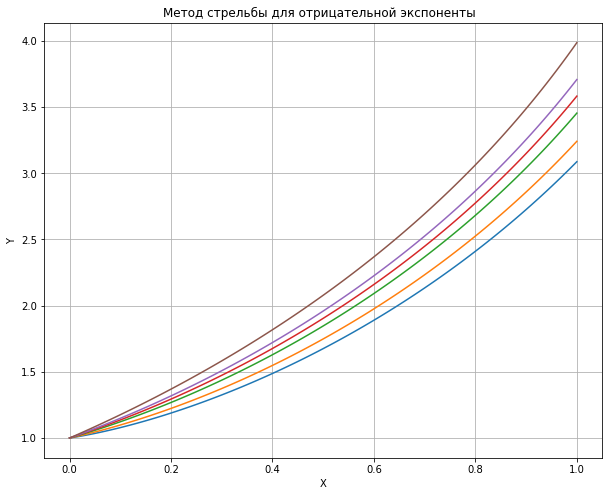

In [930]:
figure = plt.figure(figsize = (10,8))
for i in range(len(sol)):
    plt.plot(time, sol[i])

plt.title('Метод стрельбы для отрицательной экспоненты  ')
plt.ylabel('Y')
plt.xlabel('X')
plt.grid(True)
#plt.savefig('shooting.png')
plt.show

<function matplotlib.pyplot.show>

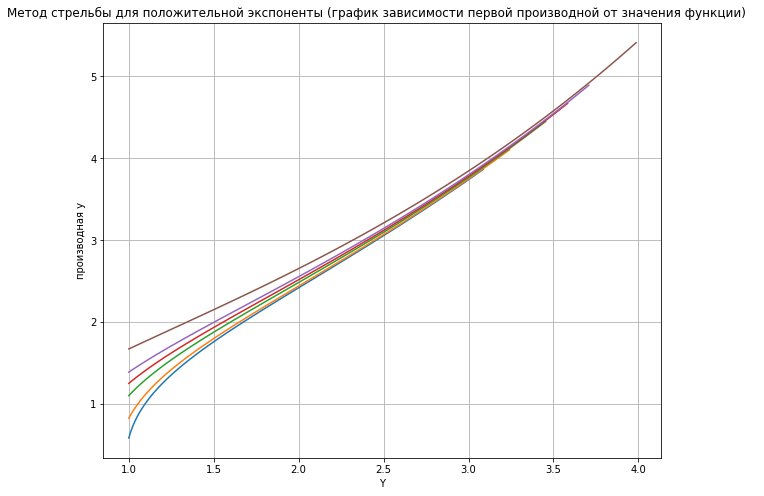

In [866]:
figure = plt.figure(figsize = (10,8))
for i in range(len(sol)):
    plt.plot(sol[i], sol_y[i])

plt.title('Метод стрельбы для положительной экспоненты (график зависимости первой производной от значения функции)   ')
plt.ylabel('производная y')
plt.xlabel('Y')
plt.grid(True)
#plt.savefig('shootingproiz.png')
plt.show

In [779]:
sol = []
for b in brange:
    y_1 = find_solution1(b) 
    y_1 = pd.DataFrame(list(map(list,y_1)))
    sol.append(y_1[0])
solc = []
for b in сrange:
    y_1 = find_solution1(b) 
    y_1 = pd.DataFrame(list(map(list,y_1)))
    solc.append(y_1[0])

-1.176003296227247
0.05640996845516044
-1.1120693876536603
0.03996774903344957
-1.1051473267635847
0.03078995034527532
-1.095126928557261
0.02337410242153415
-1.08599662606032
0.023296169564610114
-1.0859449155438199
0.02327676110968535
-1.0859320092914537
0.023271913662917365
-1.0859287840638396
0.02327070209282467
139.6058852436716
-1.0859283809479916
-1.0859281793931292


C:\Users\user\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


115.13466123735645
93.21152248810033
-1.0859281541989962
-1.0859281416074988
90.78328268286042
115.39639407659583
115.46494500688854
115.3905099166542
-1.085928141209254
115.52573505772486
115.44131065980578
-1.0859281411648274
-1.085928141139502
-1.0859281411242645
115.44544818112365
115.44564288404116
-1.0859281411217694
115.45240392909773
-1.085928141124073
-1.085928141121134
115.43839078013217
115.43847676655409
-1.0859281411232031
-1.085928141123054
-1.0859281411209172
123.44614296528243
-1.0859281411243469
123.49590349702363
-1.0859281411258097
123.4619757816949
-1.0859281411262585
123.47642496240823
-1.0859281411263773
123.42727576621002
-1.085928141126408
123.4700491383645
-1.0859281411264152
123.44651200844149
-1.0859281411264166
123.40547775365687
-1.0859281411264172
123.49065440858391
-1.0859281411264172
123.46723073526894
-1.0859281411264172
123.49958706179373
-1.0859281411264172
123.42436701897309
-1.0859281411264172
123.47836995690989
123.47836995690989
-1.085928141126417

KeyboardInterrupt: 

<function matplotlib.pyplot.show>

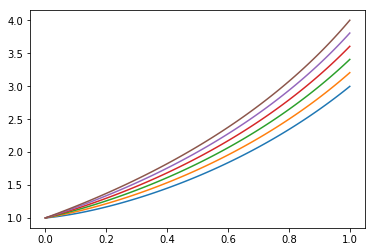

In [429]:
figure = plt.figure(figsize = (20,16))
for i in range(len(sol)):
   
    plt.plot(time, solс[i])
    plt.plot(time, sol[i])
plt.title('Метод стрельбы  ')
plt.ylabel('Y')
plt.xlabel('X')
plt.grid(True)
#plt.savefig('shootingdouble.png')
plt.show

In [911]:
def f_to_opt(y):
    b = 4
    n = len(y)
    tau =1/n
    A = np.zeros((n,n))
    A[0][0] = -2
    A[0][1] = 1
    A[-1][-1] = -2
    A[-1][-2] = 1

    for i in range(1, n -1 ):
        A[i][i-1] = 1
        A[i][i] = -2
        A[i][i+1] = 1
    f = np.zeros((n,n))
    f[0][0] = np.e
    f[0][1] = np.e
    f[-1][-1] = np.e
    f[-1][-2] = np.e
    for i in range(1, n-1):
        f[i][i-1]= np.e
        f[i][i] = np.e
        f[i][i+1] = np.e
    f = f**y

    for i in range(n):
        f[i][i]*=10
    #res = np.zeros((n,1))
    res = A*y.T-tau**2/12*f
    res[0] += 1 - np.e
    res[-1] += b - tau**2/12*np.e**b
    
    return(np.sum(res, axis = 1))

In [912]:
y_b = find_solution(4) 
y_b = pd.DataFrame(list(map(list,y_b)))

In [913]:
msolv4 = scipy.optimize.root(f_to_opt,(np.array(y_b[0])))

C:\Users\user\Miniconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in power


In [876]:
brange

array([1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ])

In [914]:
msolv3, msolv16, msolv18,msolv2, msolv22,msolv24, msolv26, msolv28, msolv32, msolv34, msolv36, msolv38, msolv4

(    fjac: array([[-8.94450949e-01,  4.47166077e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.58562820e-01, -7.17220898e-01,  5.97517270e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.95165022e-01, -3.90381892e-01, -5.85705200e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.36019265e-04, -4.72101231e-04, -7.08311916e-04, ...,
        -6.76006790e-02,  9.65452613e-01,  0.00000000e+00],
       [-2.28903956e-04, -4.57868724e-04, -6.86958330e-04, ...,
        -6.55627111e-02, -6.82107248e-02,  9.65131282e-01],
       [-8.43967878e-04, -1.68815997e-03, -2.53281233e-03, ...,
        -2.41729427e-01, -2.51492642e-01, -2.61766324e-01]])
     fun: array([-1.74526696e+02, -2.54044536e-04, -2.59914342e-04, -2.65892726e-04,
       -2.71982296e-04, -2.78185710e-04, -2.84505673e-04, -2.90944944e-04,
       -2.97506330e-04, -3.04192693e-04, -3.11006950e-04, -3.17952073e-0

In [720]:
solv3, solv32, solv34,solv36, solv38, solv4, solv13, solv11,solv09, solv07,solv05, solv03

(    fjac: array([[-8.94450949e-01,  4.47166077e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.58562386e-01, -7.17220029e-01,  5.97518574e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.95164672e-01, -3.90381193e-01, -5.85702163e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.61214297e-04, -5.22497989e-04, -7.83921479e-04, ...,
        -6.03197976e-02,  9.69196791e-01,  0.00000000e+00],
       [-2.54662070e-04, -5.09391794e-04, -7.64257809e-04, ...,
        -5.88067525e-02, -6.10155366e-02,  9.68826297e-01],
       [-9.95892103e-04, -1.99204878e-03, -2.98873844e-03, ...,
        -2.29972137e-01, -2.38609900e-01, -2.47741005e-01]])
     fun: array([-1.74540531e+02,  1.53061094e-04,  1.29518692e-04,  1.09374315e-04,
        9.18371957e-05,  7.63453930e-05,  6.24874516e-05,  4.99543948e-05,
        3.85091220e-05,  2.79662332e-05,  1.81783383e-05,  9.02652795e-0

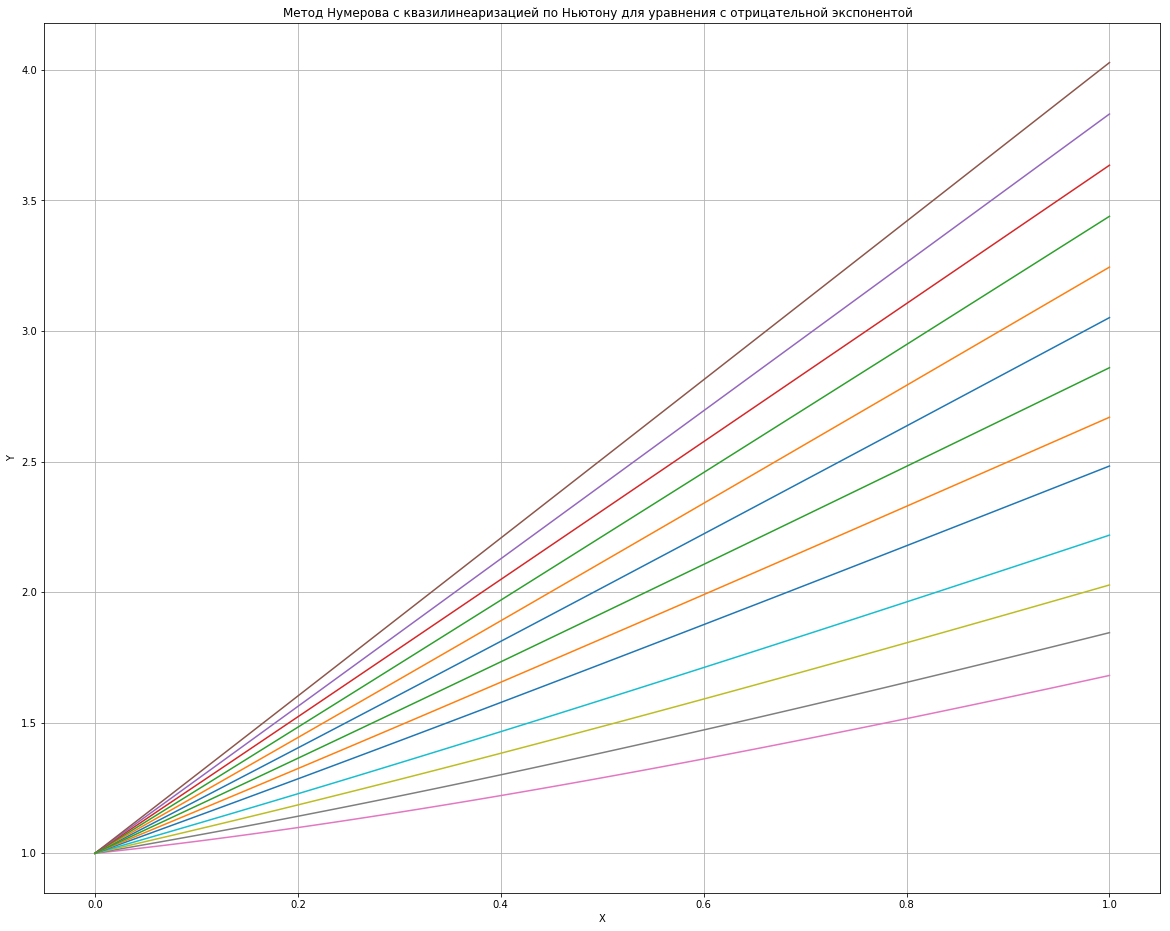

In [916]:
fig = plt.figure(figsize = (20,16))
plt.plot(time, msolv3.x)
plt.plot(time, msolv32.x)
plt.plot(time, msolv34.x)
plt.plot(time, msolv36.x)
plt.plot(time, msolv38.x)
plt.plot(time, msolv4.x)
plt.plot(time, msolv16.x)
plt.plot(time, msolv18.x)
plt.plot(time, msolv2.x)
plt.plot(time, msolv22.x)
plt.plot(time, msolv24.x)
plt.plot(time, msolv26.x)
plt.plot(time, msolv28.x)
plt.title('Метод Нумерова с квазилинеаризацией по Ньютону для уравнения с отрицательной экспонентой  ')
plt.ylabel('Y')
plt.xlabel('X')

plt.grid(True)
#plt.savefig('Minuslinear.png')
plt.show()

In [738]:
сrange 

array([-1.3, -1.1, -0.9, -0.7, -0.5, -0.3])

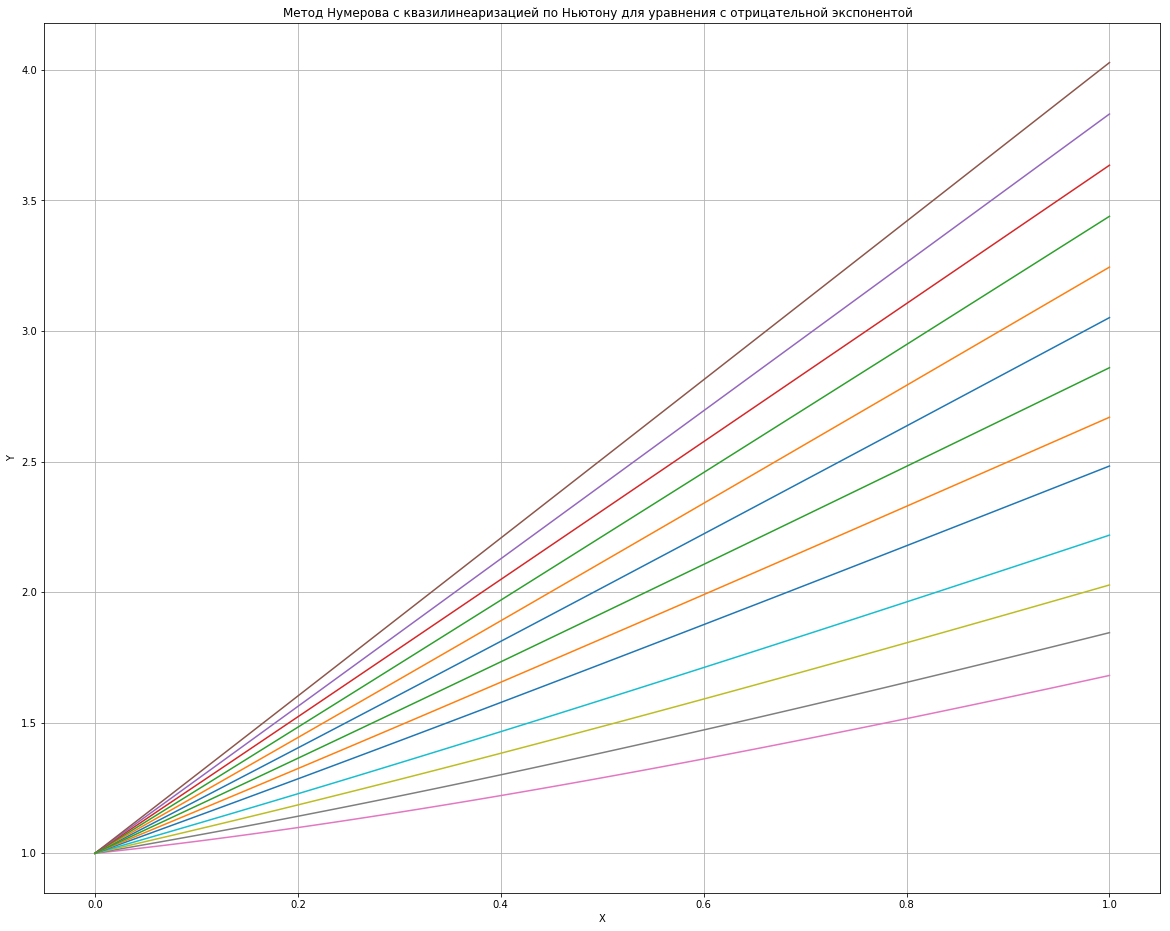

In [933]:
fig = plt.figure(figsize = (20,16))
plt.plot(time, msolv3.x)
plt.plot(time, msolv32.x)
plt.plot(time, msolv34.x)
plt.plot(time, msolv36.x)
plt.plot(time, msolv38.x)
plt.plot(time, msolv4.x)
plt.plot(time, msolv16.x)
plt.plot(time, msolv18.x)
plt.plot(time, msolv2.x)
plt.plot(time, msolv22.x)
plt.plot(time, msolv24.x)
plt.plot(time, msolv26.x)
plt.plot(time, msolv28.x)
plt.title('Метод Нумерова с квазилинеаризацией по Ньютону для уравнения с отрицательной экспонентой  ')
plt.ylabel('Y')
plt.xlabel('X')

plt.grid(True)
plt.savefig('Minuslinear.png')
plt.show()